# Skyserver Case Study
The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

## Problem Statement
We need to identify class of given instance, whether it's an Galaxy, Star or Quasar. Output variable is discrete variable, it's an classification problem. We can apply classification algorithm.

In [62]:
# Importing libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading dataset
skyserver_df=pd.read_csv("/Users/bhupendrakumar/Documents/ML Data Scientist Projects/Data-Science-ML-Capstone-Projects-master/Skyserver.csv",encoding='UTF-8')

### EDA(Exploratory Data Analysis)

In [3]:
skyserver_df.head()

objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922   
2  1.237650e+18  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732   
3  1.237650e+18  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233   
4  1.237650e+18  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492   

          z  run  rerun  camcol  field     specobjid   class  redshift  plate  \
0  15.22531  752    301       4    267  3.722360e+18    STAR -0.000009   3306   
1  16.39150  752    301       4    267  3.638140e+17    STAR -0.000055    323   
2  16.80125  752    301       4    268  3.232740e+17  GALAXY  0.123111    287   
3  15.90438  752    301       4    269  3.722370e+18    STAR -0.000111   3306   
4  16.61326  752    301       4    269  3.722370e+18    STAR  0.000590   3306   

     mjd  fiberid  
0  54922      491  
1  51615      541  
2  52023      513  
3  54922      510  
4  54922      512

In [4]:
skyserver_df.shape
# It comtains 10000 points and 17 independent and 1 dependent variables.

(10000, 18)

In [5]:
skyserver_df.describe()
# Outliers are present in variable plate, g,r,y,z
# rerun and objid contains only value, we will remove  these two columns.

objid            ra           dec             u             g  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000  10000.000000   
mean   1.237650e+18    175.529987     14.836148     18.619355     17.371931   
std    1.577039e+05     47.783439     25.212207      0.828656      0.945457   
min    1.237650e+18      8.235100     -5.382632     12.988970     12.799550   
25%    1.237650e+18    157.370946     -0.539035     18.178035     16.815100   
50%    1.237650e+18    180.394514      0.404166     18.853095     17.495135   
75%    1.237650e+18    201.547279     35.649397     19.259232     18.010145   
max    1.237650e+18    260.884382     68.542265     19.599900     19.918970   

                  r             i             z           run    rerun  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.0   
mean      16.840963     16.583579     16.422833    981.034800    301.0   
std        1.067764      1.141805      1.203188    273.305024      0.0   
min       12.431600     11.947210     11.610410    308.000000    301.0   
25%       16.173333     15.853705     15.618285    752.000000    301.0   
50%       16.858770     16.554985     16.389945    756.000000    301.0   
75%       17.512675     17.258550     17.141447   1331.000000    301.0   
max       24.802040     28.179630     22.833060   1412.000000    301.0   

             camcol         field     specobjid      redshift         plate  \
count  10000.000000  10000.000000  1.000000e+04  10000.000000  10000.000000   
mean       3.648700    302.380100  1.645022e+18      0.143726   1460.986400   
std        1.666183    162.577763  2.013998e+18      0.388774   1788.778371   
min        1.000000     11.000000  2.995780e+17     -0.004136    266.000000   
25%        2.000000    184.000000  3.389248e+17      0.000081    301.000000   
50%        4.000000    299.000000  4.966580e+17      0.042591    441.000000   
75%        5.000000    414.000000  2.881300e+18      0.092579   2559.000000   
max        6.000000    768.000000  9.468830e+18      5.353854   8410.000000   

                mjd       fiberid  
count  10000.000000  10000.000000  
mean   52943.533300    353.069400  
std     1511.150651    206.298149  
min    51578.000000      1.000000  
25%    51900.000000    186.750000  
50%    51997.000000    351.000000  
75%    54468.000000    510.000000  
max    57481.000000   1000.000000

In [6]:
# Checking Null values
skyserver_df.isnull().sum()
# There are no null values present in the dataset

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [7]:
# Checking datatypes of each feature
skyserver_df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [8]:
# Count different categories in class column
skyserver_df['class'].value_counts()
# QSO data is less than other categories. 

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [9]:
# We observed in later part that rerun and objid has same value for all the quartiles. 
# Let's count in those columns as well.
print(skyserver_df['objid'].value_counts())
print('*'*100)
print(skyserver_df['rerun'].value_counts())
# Both features have only single value, we can remove these columns for time being. Unless we observe othe properties 
#  for these two columns in particular.

1.237650e+18    10000
Name: objid, dtype: int64
****************************************************************************************************
301    10000
Name: rerun, dtype: int64


In [10]:
# Removing objid and rerun column
skyserver_df.drop('objid',axis=1,inplace=True)
skyserver_df.drop('rerun',axis=1,inplace=True)

In [11]:
columnList=list(skyserver_df.columns)
columnList.remove('class')

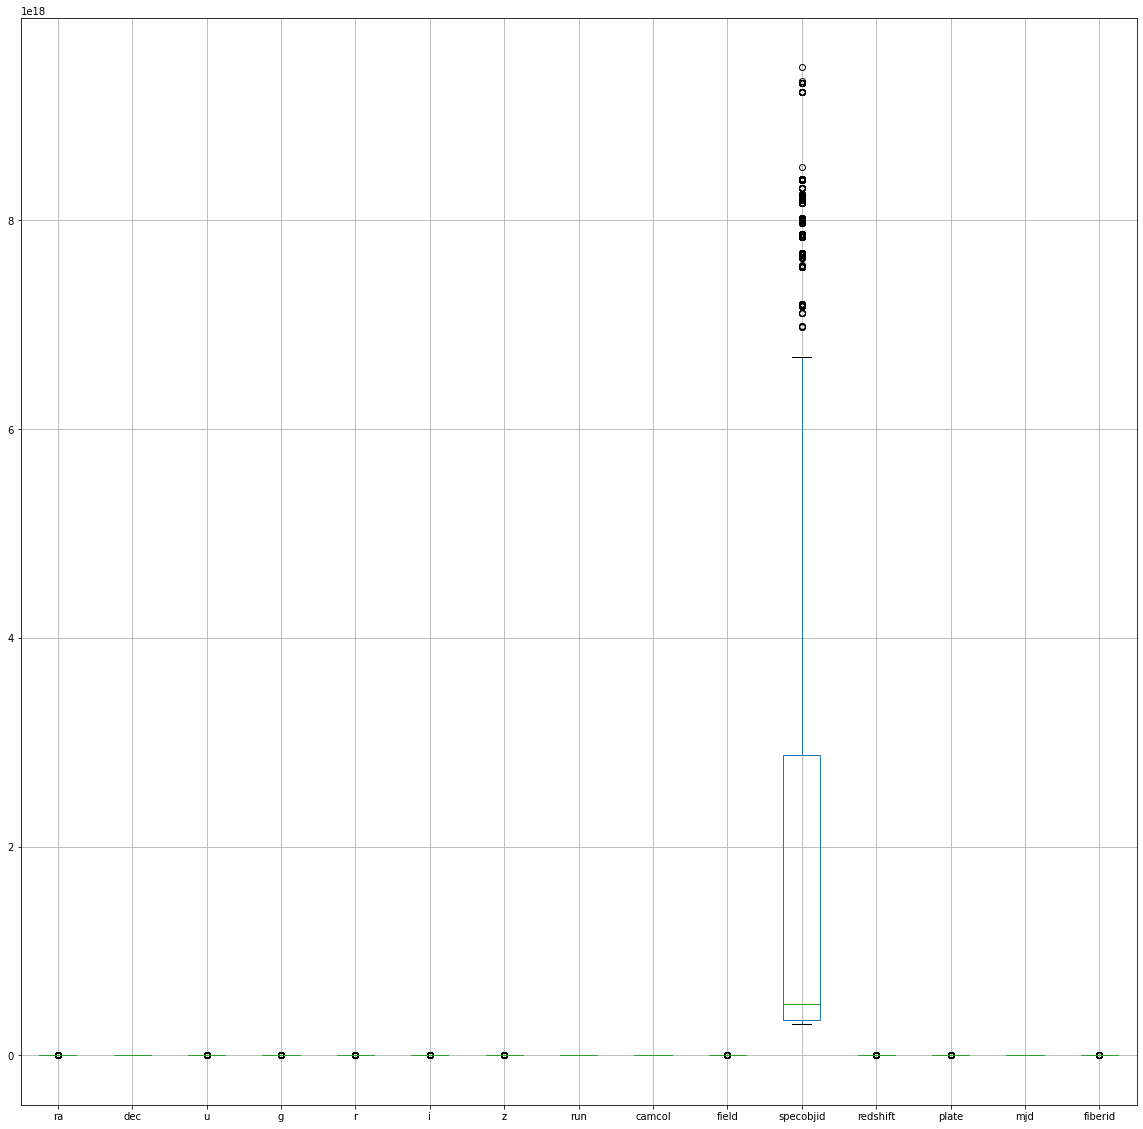

In [12]:
# Plotting boxplots
plt.figure(figsize=(20,20))
skyserver_df.boxplot(column=columnList)
# Outliers are present in column specobjid. After further analysis we will decide, whether to remove outliers or not.

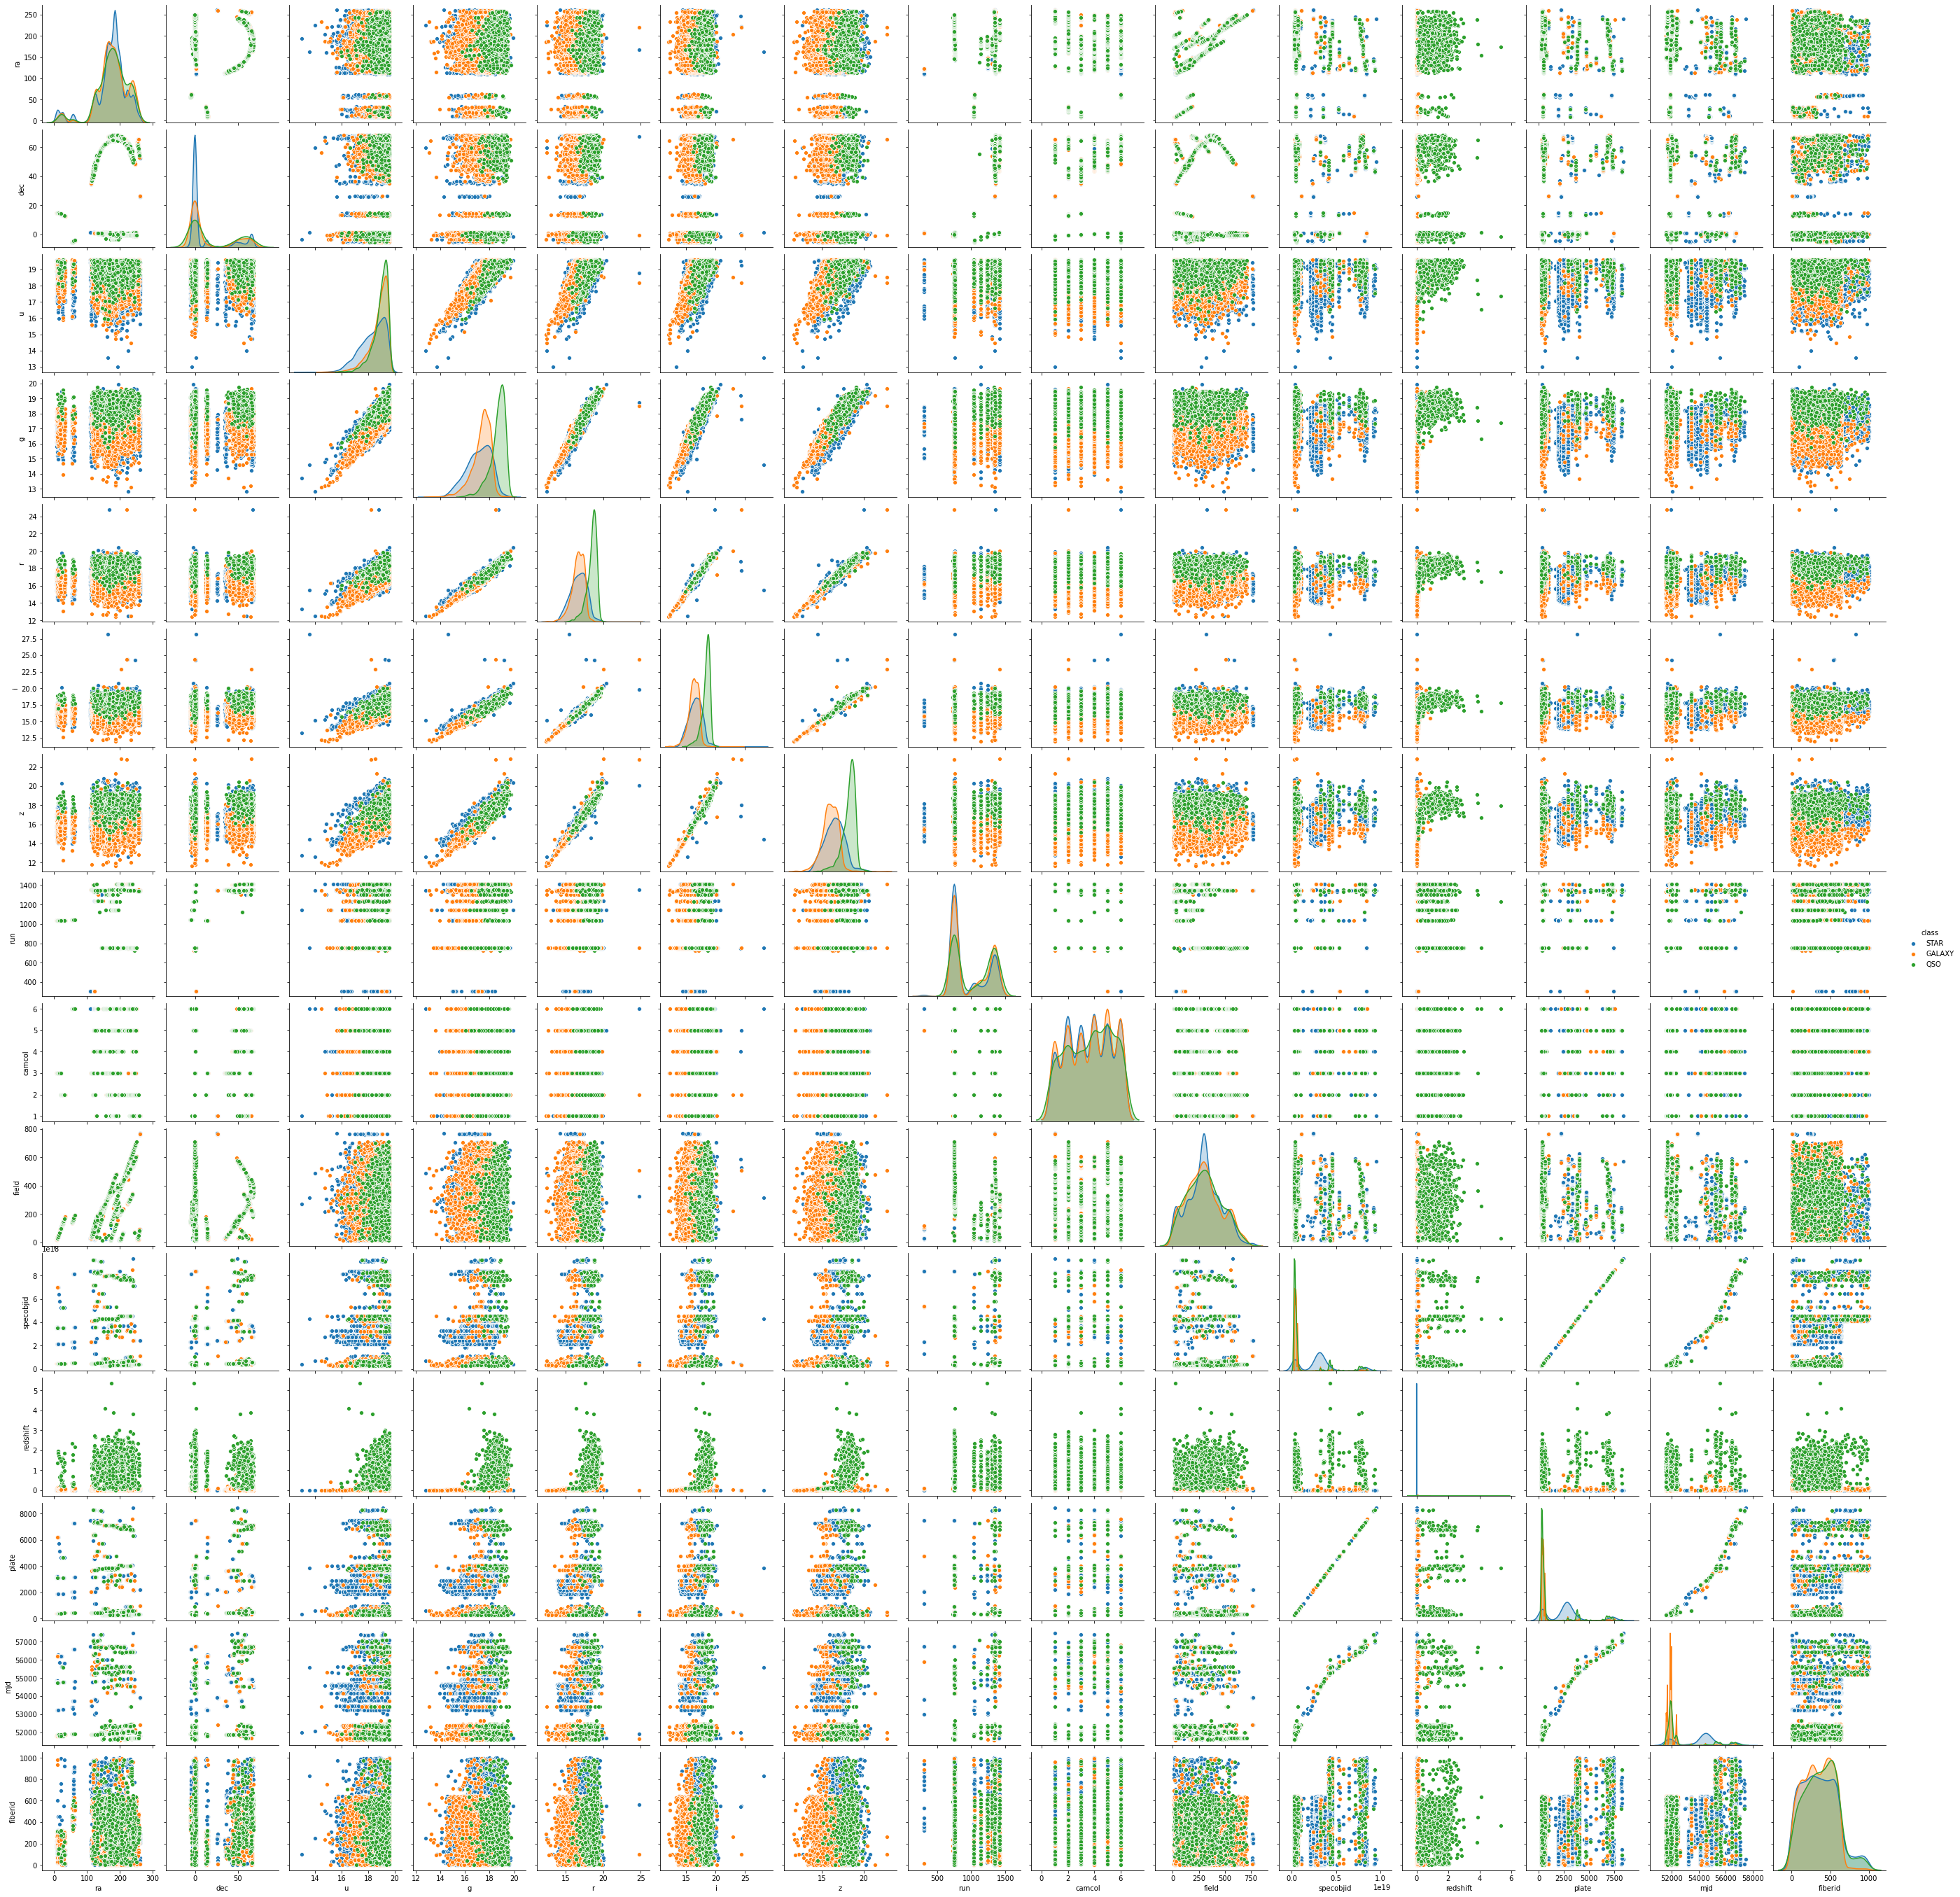

In [13]:
# pair plot
sns.pairplot(skyserver_df,hue='class')

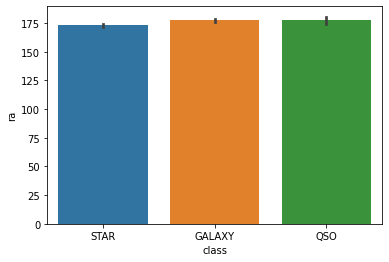

In [14]:
# Barplots
sns.barplot(x='class',y='ra',data=skyserver_df)
# class is not effected by ra, as we can see

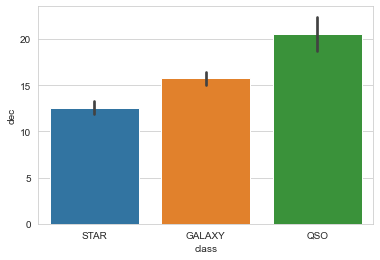

In [15]:
sns.set_style('whitegrid')
sns.barplot(x='class',y='dec',data=skyserver_df)
#Average for QSO is higher so definetely, dec is going to be a useful feature. As it varies

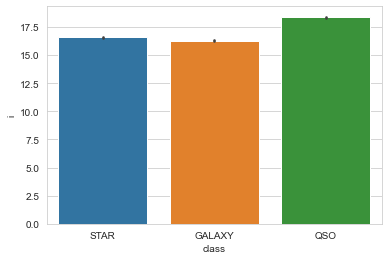

In [16]:
sns.set_style('whitegrid')
sns.barplot(x='class',y='i',data=skyserver_df)

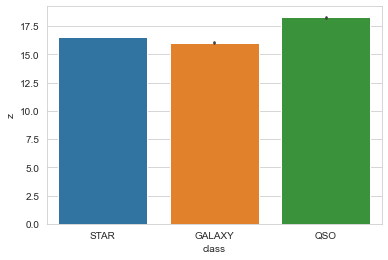

In [17]:
sns.set_style('whitegrid')
sns.barplot(x='class',y='z',data=skyserver_df)

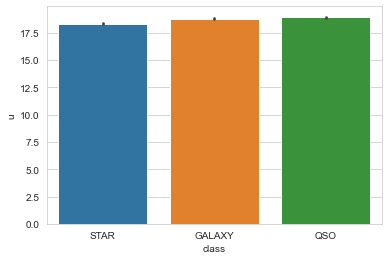

In [18]:
sns.set_style('whitegrid')
sns.barplot(x='class',y='u',data=skyserver_df)

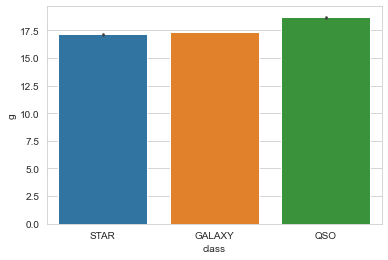

In [19]:
sns.set_style('whitegrid')
sns.barplot(x='class',y='g',data=skyserver_df)

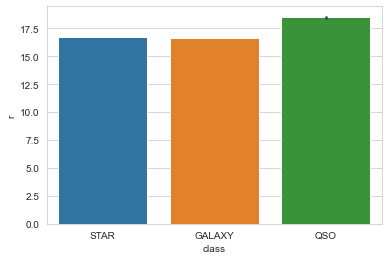

In [20]:
sns.set_style('whitegrid')
sns.barplot(x='class',y='r',data=skyserver_df)

### Observation:
i. u, g, r ,i and z have similar average for all different attributes in class feature. 
We can remove 4 features out of it. As we have observed in pairplot as well that mentioned features are highly correlated.

### Bivariate Analysis

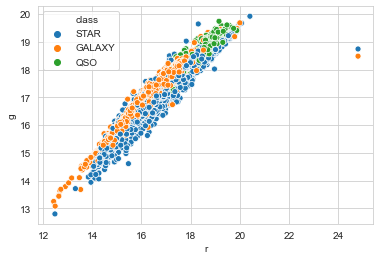

In [21]:
sns.scatterplot(data=skyserver_df, x="r", y="g", hue="class")
# Can't distinguish properly.

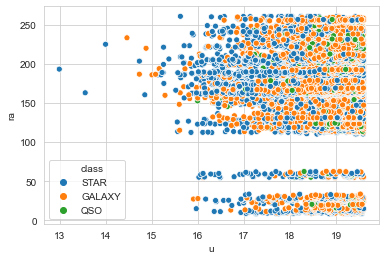

In [22]:
sns.scatterplot(data=skyserver_df, x="u", y="ra", hue="class")
# Can't distinguish properly.

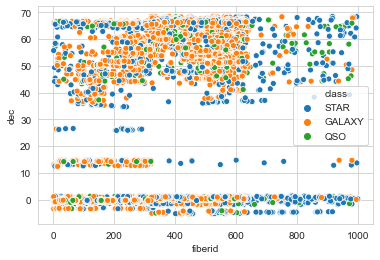

In [23]:
sns.scatterplot(data=skyserver_df, x="fiberid", y="dec", hue="class")
# Can't distinguish properly.

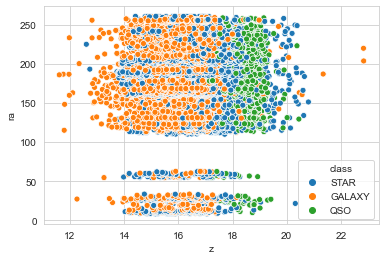

In [24]:
sns.scatterplot(data=skyserver_df, x="z", y="ra", hue="class")
# Can't distinguish properly.

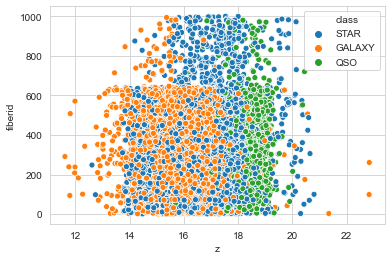

In [25]:
sns.scatterplot(data=skyserver_df, x="z", y="fiberid", hue="class")
# Can't distinguish properly.

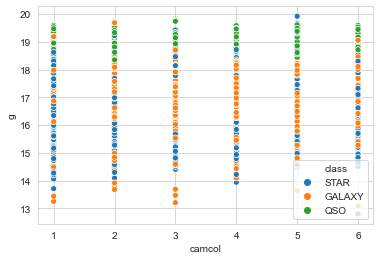

In [26]:
sns.scatterplot(data=skyserver_df, x="camcol", y="g", hue="class")
# Can't distinguish properly.

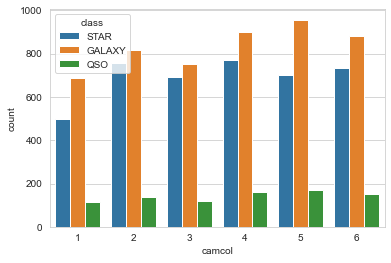

In [27]:
sns.countplot(x='camcol',hue='class',data=skyserver_df)
# Galaxy has more counts and QSO least and very less comparision to Galxy and STAR

In [28]:
skyserver_df.head()

ra       dec         u         g         r         i         z  \
0  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   

   run  camcol  field     specobjid   class  redshift  plate    mjd  fiberid  
0  752       4    267  3.722360e+18    STAR -0.000009   3306  54922      491  
1  752       4    267  3.638140e+17    STAR -0.000055    323  51615      541  
2  752       4    268  3.232740e+17  GALAXY  0.123111    287  52023      513  
3  752       4    269  3.722370e+18    STAR -0.000111   3306  54922      510  
4  752       4    269  3.722370e+18    STAR  0.000590   3306  54922      512

In [29]:
# Converting categorical feature 'class' to numeric.
from sklearn.preprocessing import LabelEncoder
skyserver_df['class']=LabelEncoder().fit_transform(skyserver_df['class'])
# STAR---> 2
# GALAXY---> 0
# QSO--->1

## Feature Selection

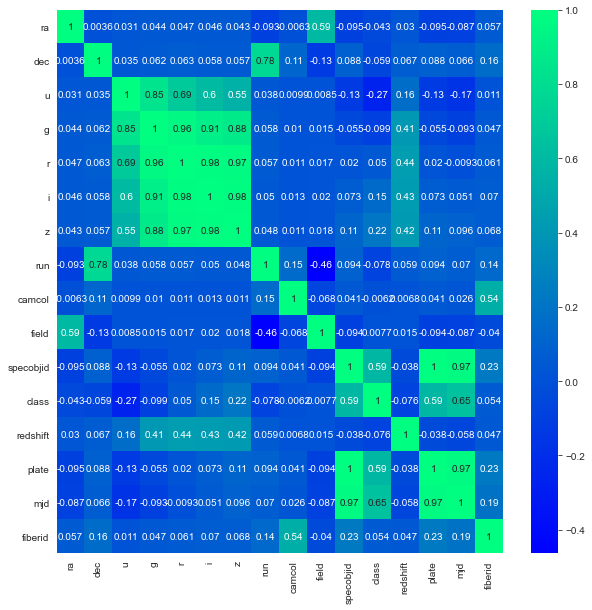

In [30]:
skyserver_copy=skyserver_df.copy()
corrMat=skyserver_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrMat,annot=True,cmap='winter')

In [31]:
skyserver_df.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field',
       'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [32]:
colToremove=['g','r','i','z','run','mjd','plate']
for col in colToremove:
    skyserver_df.drop(col,axis=1,inplace=True)

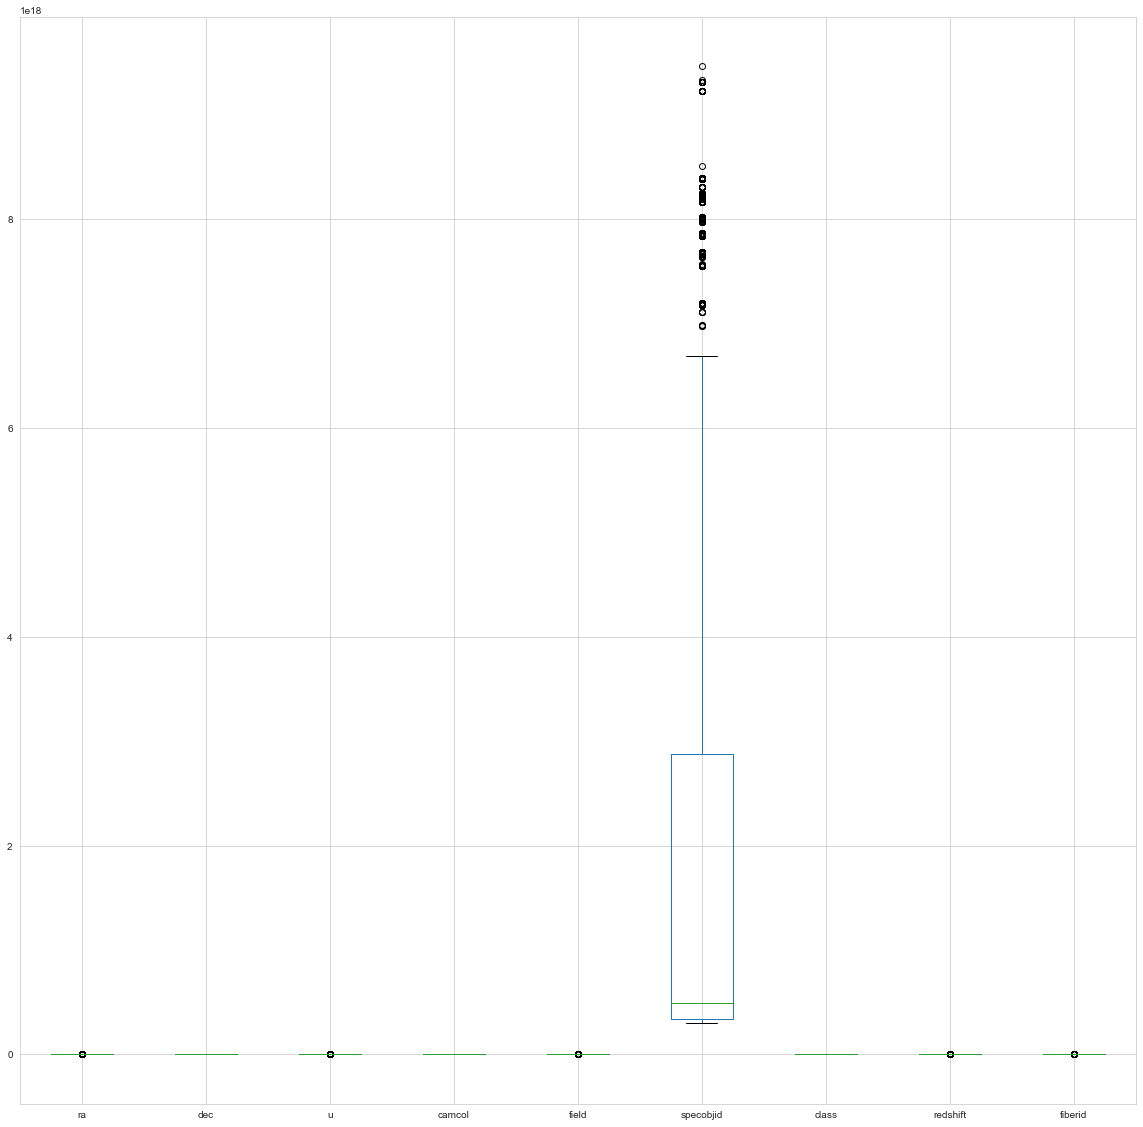

In [33]:
columnList=list(skyserver_df.columns)

plt.figure(figsize=(20,20))
skyserver_df.boxplot(column=columnList)

In [34]:
# Removal of outliers using boxplot approach.
col_names=list(skyserver_df.columns)
col_names.remove('class')
skyserver_df=skyserver_df.copy()
    
for col in col_names:
    q75,q25=np.percentile(skyserver_df.loc[:,col],[75,25])
    # Calculating inter quartile range
    iqr=q75-q25
    # Calculating min and max threshold for being an outlier point.
    minThresh=q25-(iqr*1.5)
    maxThresh=q75+(iqr*1.5)
    
    skyserver_df=skyserver_df.drop(skyserver_df[skyserver_df.loc[:,col]<minThresh].index)
    skyserver_df=skyserver_df.drop(skyserver_df[skyserver_df.loc[:,col]>maxThresh].index)

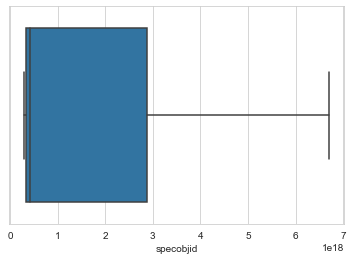

In [35]:
sns.boxplot(skyserver_df['specobjid'])
# We have removed outliers, Now we can go ahead with model selection

In [36]:
skyserver_df.shape

(8046, 9)

## Model Selection

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

In [38]:
Y=skyserver_df['class']
X=skyserver_df.drop('class',axis=1)

In [39]:
print(Y.shape)
print(X.shape)

(8046,)
(8046, 8)


In [40]:
X.columns

Index(['ra', 'dec', 'u', 'camcol', 'field', 'specobjid', 'redshift',
       'fiberid'],
      dtype='object')

### Normalization

In [41]:
cols2norm=list(X.columns)

for col in cols2norm:
    X[col]=(X[col]-min(X[col]))/(max(X[col])-min(X[col]))

In [42]:
X.head()

ra       dec         u  camcol     field  specobjid  redshift  \
0  0.483795  0.050340  0.958289     0.6  0.365714   0.535409  0.017086   
1  0.484248  0.050972  0.689391     0.6  0.365714   0.010048  0.016896   
2  0.484801  0.050846  0.928100     0.6  0.367143   0.003707  0.526807   
3  0.486087  0.049788  0.391928     0.6  0.368571   0.535411  0.016666   
4  0.486173  0.050518  0.320629     0.6  0.368571   0.535411  0.019568   

    fiberid  
0  0.507772  
1  0.559585  
2  0.530570  
3  0.527461  
4  0.529534

### Model Selection

In [43]:
max_accScore=0
active_as=0
iBest_rs=0
# cm: classification model
cm=DecisionTreeClassifier()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    cm.fit(x_train,y_train)
    pred=cm.predict(x_test)
    active_as=accuracy_score(pred,y_test)
    if active_as>max_accScore:
        max_accScore=active_as
        iBest_rs=iActive_rs
print("Best(max) accuracy score is {} for random state {}.".format(max_accScore,iBest_rs))
# For random state 83 we are getting accuracy of 99.

Best(max) accuracy score is 0.991304347826087 for random state 83.


In [44]:
max_accScore=0
active_as=0
iBest_rs=0
# cm: classification model
cm=KNeighborsClassifier()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    cm.fit(x_train,y_train)
    pred=cm.predict(x_test)
    active_as=accuracy_score(pred,y_test)
    if active_as>max_accScore:
        max_accScore=active_as
        iBest_rs=iActive_rs
print("Best(max) accuracy score is {} for random state {}.".format(max_accScore,iBest_rs))
# For random state 49 we are getting accuracy of 97.

Best(max) accuracy score is 0.9670807453416149 for random state 49.


In [45]:
max_accScore=0
active_as=0
iBest_rs=0
# cm: classification model
cm=LogisticRegression()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    cm.fit(x_train,y_train)
    pred=cm.predict(x_test)
    active_as=accuracy_score(pred,y_test)
    if active_as>max_accScore:
        max_accScore=active_as
        iBest_rs=iActive_rs
print("Best(max) accuracy score is {} for random state {}.".format(max_accScore,iBest_rs))
# For random state 87 we are getting accuracy of 99.

Best(max) accuracy score is 0.9900621118012423 for random state 87.


In [46]:
max_accScore=0
active_as=0
iBest_rs=0
# cm: classification model
cm=SVC(kernel='rbf')
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    cm.fit(x_train,y_train)
    pred=cm.predict(x_test)
    active_as=accuracy_score(pred,y_test)
    if active_as>max_accScore:
        max_accScore=active_as
        iBest_rs=iActive_rs
print("Best(max) accuracy score is {} for random state {}.".format(max_accScore,iBest_rs))
# For random state 87 we are getting accuracy of 99.

Best(max) accuracy score is 0.9888198757763975 for random state 87.


In [48]:
max_accScore=0
active_as=0
iBest_rs=0
# cm: classification model
cm=RandomForestClassifier()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    cm.fit(x_train,y_train)
    pred=cm.predict(x_test)
    active_as=accuracy_score(pred,y_test)
    if active_as>max_accScore:
        max_accScore=active_as
        iBest_rs=iActive_rs
print("Best(max) accuracy score is {} for random state {}.".format(max_accScore,iBest_rs))
# For random state 80 we are getting accuracy of 99.

Best(max) accuracy score is 0.9937888198757764 for random state 80.


In [49]:
max_accScore=0
active_as=0
iBest_rs=0
# cm: classification model
cm=AdaBoostClassifier()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    cm.fit(x_train,y_train)
    pred=cm.predict(x_test)
    active_as=accuracy_score(pred,y_test)
    if active_as>max_accScore:
        max_accScore=active_as
        iBest_rs=iActive_rs
print("Best(max) accuracy score is {} for random state {}.".format(max_accScore,iBest_rs))
# For random state 59 we are getting accuracy of 99.

Best(max) accuracy score is 0.993167701863354 for random state 59.


In [50]:
max_accScore=0
active_as=0
iBest_rs=0
# cm: classification model
cm=GradientBoostingClassifier()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    cm.fit(x_train,y_train)
    pred=cm.predict(x_test)
    active_as=accuracy_score(pred,y_test)
    if active_as>max_accScore:
        max_accScore=active_as
        iBest_rs=iActive_rs
print("Best(max) accuracy score is {} for random state {}.".format(max_accScore,iBest_rs))
# For random state 54 we are getting accuracy of 99.

Best(max) accuracy score is 0.9925465838509316 for random state 54.


In [53]:
# Hyper Tune Random Forest Classifier

RFC=RandomForestClassifier()
parameters = {"criterion":['gini','entropy'],"max_depth":[2,4,6,8,10], "max_features":['auto','log2','sqrt']}

In [55]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(RFC,parameters)
gs.fit(x_train,y_train)
gs.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [63]:
# Finalizing RandomForest Model
cm=RandomForestClassifier(max_features='log2',max_depth=2)
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=80,test_size=0.2)
cm.fit(x_train,y_train)
pred=cm.predict(x_test)
active_as=accuracy_score(pred,y_test)
print("Accuracy score is {}".format(active_as))
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))
# True rates are higher, for all categories, as we can see in column of predicted matrix.

Accuracy score is 0.993167701863354
[[948   6   1]
 [  0   0   0]
 [  4   0 651]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       955
           1       0.00      0.00      0.00         0
           2       1.00      0.99      1.00       655

    accuracy                           0.99      1610
   macro avg       0.66      0.66      0.66      1610
weighted avg       1.00      0.99      1.00      1610



In [65]:
from sklearn.model_selection import cross_val_score
# Calc cross validation scores to get better idea.
score=cross_val_score(cm,X,Y,cv=30,scoring='accuracy').mean()
print("std: {}".format(score.std()))
print("cross_val_score: {}".format(score*100))
# Score is approximately 99% We are not under or overfitting the model.

std: 0.0
cross_val_score: 98.98093177236497


In [69]:
# Saving the model using joblib
import joblib
# Saving model as pickle in a file
joblib.dump(cm,'RandomForest_skyserver.pkl')

['RandomForest_skyserver.pkl']